In [1]:
from multiprocessing import freeze_support
import pandas as pd
import string
import nltk
import re
import matplotlib.pyplot as plt
import gensim.corpora as corpora
import gensim
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pprint import pprint
import numpy as np
from gensim.models import Phrases, CoherenceModel
from nltk.tokenize import word_tokenize
from gensim.test.utils import datapath
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from gensim.corpora import Dictionary
import pickle
from gensim.test.utils import datapath

from ipynb.fs.full.MLDRS_preprocessing import remove_punc, tokenization, remove_stopwords, lemmization, cleanResume, preprocessing, TokenizeLemm
from ipynb.fs.full.MLDRS_tools import createList, find_optimal_clusters, plot_tsne_pca

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('wordnet')
nltk.download('punkt')

wordnet_lemmatizer = WordNetLemmatizer()
wpt = nltk.WordPunctTokenizer()
lemmatizer = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\

In [2]:
# Point to directories 
jobs = pd.read_csv(r"C://Users//zesha//Downloads//all_jobs.csv")

In [3]:
# How many jobs and resumes
print("Number of jobs: " + str(jobs.shape[0]))

# We are only running our model based on the job description
jobs_desc = jobs['job_description'].copy()

Number of jobs: 20000
Number of resumes: 29783


In [4]:
corpus = preprocessing(jobs_desc)
corpus = jobs_desc['cleaned'].tolist()    

Cleaned corpus
Removed punctuation
Lowercase
Tokenized corpus
Removed Stopwords
Lemmatized corpus


In [5]:
corpus_list = createList(corpus)

In [6]:
corpus_final, id2word, texts = TokenizeLemm(corpus_list)

In [7]:
dataframe = pd.DataFrame(corpus_list)
dataframe.columns = ["Description"]

In [8]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 2000,
    stop_words = 'english'
)
tfidf.fit(dataframe.Description)
text = tfidf.transform(dataframe.Description)

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters


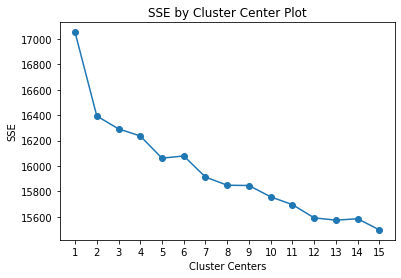

In [9]:
find_optimal_clusters(text, 15)

In [10]:
clusters = MiniBatchKMeans(n_clusters=12, init_size= 200, batch_size=400, random_state=0).fit_predict(text)

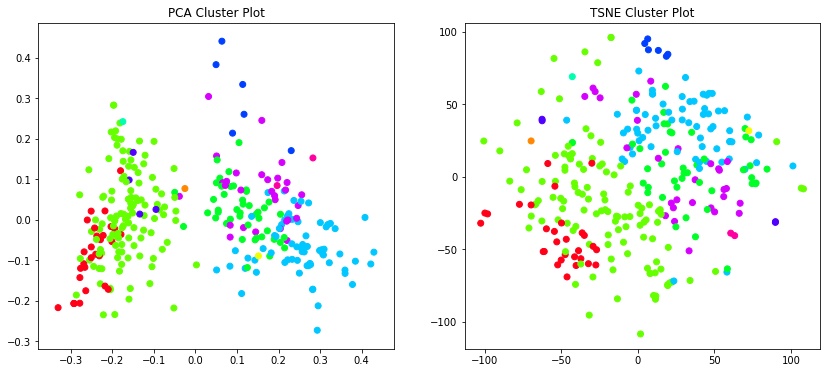

In [11]:
plot_tsne_pca(text, clusters)

In [12]:
# Actual LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus_final,
                                       id2word=id2word,
                                       num_topics=12, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')

# save the model to disk
filename = 'C://Users//zesha//Desktop//model'
pickle.dump(lda_model, open(filename, 'wb'))

In [13]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_final]

[(0,
  '0.020*"’" + 0.016*"u" + 0.014*"training" + 0.013*"es" + 0.011*"—" + '
  '0.011*"career" + 0.009*"world" + 0.008*"information" + 0.007*"build" + '
  '0.007*"professional"'),
 (1,
  '0.018*"’" + 0.012*"product" + 0.012*"customer" + 0.009*"people" + '
  '0.007*"world" + 0.007*"help" + 0.006*"u" + 0.006*"company" + 0.006*"best" + '
  '0.006*"role"'),
 (2,
  '0.014*"c" + 0.014*"e" + 0.013*"g" + 0.012*"research" + 0.012*"plus" + '
  '0.011*"product" + 0.011*"language" + 0.010*"etc" + 0.010*"java" + '
  '0.009*"python"'),
 (3,
  '0.104*"•" + 0.021*"nbsp" + 0.012*"cloud" + 0.011*"developer" + '
  '0.010*"programming" + 0.008*"java" + 0.008*"global" + 0.008*"database" + '
  '0.008*"analyze" + 0.008*"language"'),
 (4,
  '0.017*"security" + 0.012*"engineering" + 0.012*"information" + 0.011*"must" '
  '+ 0.010*"clearance" + 0.009*"position" + 0.008*"government" + '
  '0.008*"mission" + 0.007*"qualification" + 0.007*"intelligence"'),
 (5,
  '0.011*"management" + 0.010*"information" + 0.009*

In [14]:
topics_list = []
count = 0
for document in corpus_final:
    count = count+1
    topics = lda_model[document]
    topics_list.append(topics[0])
    if(count%1000 == 0):
        print("Done: " + str(int(count / len(corpus_final) * 100)) + "%")

Done: 5%
Done: 10%
Done: 15%
Done: 20%
Done: 25%
Done: 30%
Done: 35%
Done: 40%
Done: 45%
Done: 50%
Done: 55%
Done: 60%
Done: 65%
Done: 70%
Done: 75%
Done: 80%
Done: 85%
Done: 90%
Done: 95%
Done: 100%


In [23]:
jobs['Topics'] = topics_list

filename2 = 'C://Users//zesha//Desktop//jobs'
pickle.dump(jobs, open(filename2, 'wb'))

jobs.head()

,Unnamed: 0,job_title,category,company_name,inferred_city,inferred_state,inferred_country,job_description,job_type,Topics
0,0,Sr. Software Developer,architecture and engineering,Aerotek,Raleigh,North carolina,Usa,The chosen Sr. Software Developer will be part...,Full Time,"[(5, 0.031254448), (7, 0.5318472), (8, 0.03547..."
1,1,C# Lead Software Developer,NaN,3coast,Middletown,New jersey,Usa,Position: C# Lead Software Developer Locat...,Full Time,"[(6, 0.15490389), (9, 0.15251493), (11, 0.6862..."
2,2,Senior Software Developer,NaN,s.com,Hoboken,New jersey,Usa,"Senior Software Developer Hoboken, NJ Starts a...",Contract,"[(3, 0.0666958), (6, 0.25409305), (7, 0.144654..."
3,3,Senior Software Developer,NaN,"Mitchell Martin, Inc.",Hoboken,New jersey,Usa,"Our client, a multinational publishing and edu...",Contract,"[(1, 0.070368536), (5, 0.027089432), (6, 0.112..."
4,4,C# Lead Software Developer,NaN,3coast,Philadelphia,Pennsylvania,Usa,Position: C# Lead Software Developer Locat...,Full Time,"[(2, 0.028124949), (6, 0.14713989), (9, 0.1506..."


In [16]:
resumes = resumes.drop(columns=['Unnamed: 0'])
resumes.head()
resume = resumes.iloc[0]['resumes']

In [17]:
resume1 = remove_punc(resume)
resume1 = tokenization(resume1)
resume1 = remove_stopwords(resume1)
resume1 = lemmization(resume1)

In [18]:
dct = Dictionary([resume1])
resume_updated = dct.doc2bow(resume1)

In [19]:
resume_topics = lda_model[resume_updated]

In [20]:
print(resume_topics[0])

[(1, 0.038098007), (5, 0.04484209), (6, 0.114099436), (7, 0.1725353), (9, 0.10110039), (11, 0.51846963)]
